<a href="https://colab.research.google.com/github/ykitaguchi77/Colab_Scripts/blob/master/Mediapipe_hand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mediapipe


     |████████████████████████████████| 37.7MB 101kB/s 


In [20]:
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

import cv2

#サポートパッチのインポート
from google.colab.patches import cv2_imshow

In [4]:
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(
    min_detection_confidence=0.7,
    min_tracking_confidence=0.5,
)

In [18]:
image = cv2.imread('/content/hand.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = hands.process(image)

print(results)

<class 'mediapipe.python.solution_base.SolutionOutputs'>


Handedness: [classification {
  index: 1
  score: 0.999992311000824
  label: "Right"
}
]
hand_landmarks: landmark {
  x: 0.4505983591079712
  y: 0.5806224942207336
  z: -9.618875628802925e-05
}
landmark {
  x: 0.48993730545043945
  y: 0.37946122884750366
  z: -0.04848950356245041
}
landmark {
  x: 0.5586813688278198
  y: 0.2364509403705597
  z: -0.08064205199480057
}
landmark {
  x: 0.6261841058731079
  y: 0.1341598927974701
  z: -0.11837640404701233
}
landmark {
  x: 0.6667588353157043
  y: 0.029990047216415405
  z: -0.15869952738285065
}
landmark {
  x: 0.7139483094215393
  y: 0.44400084018707275
  z: -0.015279348008334637
}
landmark {
  x: 0.82192462682724
  y: 0.4124504029750824
  z: -0.031275033950805664
}
landmark {
  x: 0.8875325322151184
  y: 0.4087849259376526
  z: -0.058060165494680405
}
landmark {
  x: 0.9416887760162354
  y: 0.4170078933238983
  z: -0.07692423462867737
}
landmark {
  x: 0.7218817472457886
  y: 0.574507474899292
  z: -0.018891066312789917
}
landmark {
  x: 0

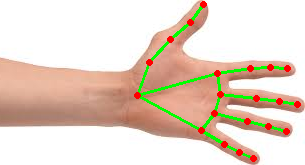

In [23]:
# For static images:
IMAGE_FILES = ['/content/hand.jpg']
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:
  for idx, file in enumerate(IMAGE_FILES):
    # Read an image, flip it around y-axis for correct handedness output (see
    # above).
    image = cv2.flip(cv2.imread(file), 1)
    # Convert the BGR image to RGB before processing.
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print handedness and draw hand landmarks on the image.
    print('Handedness:', results.multi_handedness)
    if not results.multi_hand_landmarks:
      continue
    image_height, image_width, _ = image.shape
    annotated_image = image.copy()
    for hand_landmarks in results.multi_hand_landmarks:
      print('hand_landmarks:', hand_landmarks)
      print(
          f'Index finger tip coordinates: (',
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
      )
      mp_drawing.draw_landmarks(
          annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
    cv2.imwrite(
        '/tmp/annotated_image' + str(idx) + '.png', cv2.flip(annotated_image, 1))
    
cv2_imshow(annotated_image)